In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

Cargamos el dataset diamonds:

In [4]:
data = seaborn.load_dataset('diamonds')

### Intro to classes

In [58]:
string_ = 'ok'

In [59]:
string_.upper()

'OK'

In [60]:
class Perro():
    def __init__(self, name):
        self.name_ = name
        self.color_ = 'marron'
        self.vivo_ = True
    def ladrar(self):
        if self.vivo_:
            print('Guau!')
    

In [61]:
tobby = Perro('Tobby')
lassie = Perro('Lassie')

In [62]:
tobby.name_

'Tobby'

In [63]:
lassie.ladrar()

Guau!


In [64]:
lassie.vivo_ = False

In [65]:
lassie.ladrar()

In [66]:
np.pi

3.141592653589793

# Saving a dataset

In [67]:
subdata = data.head(1000)

In [68]:
type(subdata)

pandas.core.frame.DataFrame

In [69]:
subdata.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [70]:
subdata.to_csv('./ejemplo_csv.csv', decimal=',', sep='|')

In [71]:
pd.read_csv('./ejemplo_csv.csv', sep='|', decimal=',', index_col=0, nrows=10 )

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [72]:
for num, list_data in enumerate(['a','b']):
    print(num,list_data)

0 a
1 b


In [73]:
data_generator = pd.read_csv('./ejemplo_csv.csv', sep='|',
                             decimal=',', index_col=0, chunksize=100 )
    

In [74]:
data_generator

In [75]:
for num, dat in enumerate(data_generator):
    print(dat.head(1))
    print(num)

   carat    cut color clarity  depth  table  price     x     y     z
0   0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
0
     carat        cut color clarity  depth  table  price    x     y     z
100   0.75  Very Good     D     SI1   63.2   56.0   2760  5.8  5.75  3.65
1
     carat        cut color clarity  depth  table  price     x    y     z
200    0.7  Very Good     E     SI1   59.9   63.0   2777  5.76  5.7  3.43
2
     carat    cut color clarity  depth  table  price     x     y     z
300   0.77  Ideal     I     VS1   61.5   59.0   2798  5.87  5.91  3.62
3
     carat   cut color clarity  depth  table  price     x    y    z
400    0.3  Good     H     SI1   63.8   55.0    554  4.26  4.2  2.7
4
     carat    cut color clarity  depth  table  price     x     y     z
500   0.71  Ideal     D     SI1   60.2   56.0   2822  5.86  5.83  3.52
5
     carat      cut color clarity  depth  table  price     x     y     z
600    0.7  Premium     F     VS2   59.4   61.0   2838  5.83 

In [76]:
str({"key1":0})

"{'key1': 0}"

# Ejercicios manipulación de datos:

Recordad que hay varias formas de hacer bien los ejercicios. En las soluciones intento resolver los ejercicios de forma que podamos repasar conceptos o ver formas más complicadas con las que profundizar en pandas.

## Estudio preliminar

1. Haz un estudio preliminar del dataset: Tamaño, tipo de variables, estadísticos básicos.

In [5]:
data.shape

(53940, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## The grammar of data manipulation

### Seleccionar

2. Selecciona la columna 'price' y toma su media:

In [8]:
data['price'].mean()

3932.799721913237

In [9]:
data.price.mean()

3932.799721913237

3. Selecciona por posición las variables 'x' e 'y' y restalas creando una columna nueva 'dif_xy'.

In [10]:
data.loc[:,'dif_xy'] = -1*data.iloc[:, -3:-1]\
.diff(axis=1).dropna(axis=1).values

In [11]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,dif_xy
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-0.03
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.05
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-0.02
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-0.03
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-0.01


4. Elimina la variable que acabas de crear. Sin asignar con data = ...

In [12]:
data.drop('dif_xy', axis=1, inplace=True)

In [13]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Filtrar

5. Sólo dispongo de 1000 $ como mucho. ¿Qué tipo de diamante puedo esperar (estadísticos básicos)?

In [14]:
data.loc[data.price <= 1000,:].describe()

,carat,depth,table,price,x,y,z
count,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000
mean,0.334937,61.751205,56.968246,708.384880,4.450930,4.463025,2.751935
std,0.053038,1.162221,2.084667,161.849058,0.230993,0.229320,0.147038
min,0.200000,51.000000,44.000000,326.000000,3.730000,3.680000,2.240000
25%,0.300000,61.200000,55.000000,579.000000,4.310000,4.320000,2.670000
50%,0.320000,61.800000,57.000000,709.000000,4.410000,4.420000,2.720000
75%,0.370000,62.400000,58.000000,842.000000,4.610000,4.620000,2.840000
max,0.720000,71.000000,68.000000,1000.000000,6.650000,6.020000,4.440000


In [15]:
data.query('price <= 1000').describe()

,carat,depth,table,price,x,y,z
count,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000,14524.000000
mean,0.334937,61.751205,56.968246,708.384880,4.450930,4.463025,2.751935
std,0.053038,1.162221,2.084667,161.849058,0.230993,0.229320,0.147038
min,0.200000,51.000000,44.000000,326.000000,3.730000,3.680000,2.240000
25%,0.300000,61.200000,55.000000,579.000000,4.310000,4.320000,2.670000
50%,0.320000,61.800000,57.000000,709.000000,4.410000,4.420000,2.720000
75%,0.370000,62.400000,58.000000,842.000000,4.610000,4.620000,2.840000
max,0.720000,71.000000,68.000000,1000.000000,6.650000,6.020000,4.440000


6. Además, me gustaría que fuese de corte Premium y carat por encima del percentil 25 del dataset global. Muéstrame 8 cualquiera que cumplan las dos condiciones.

In [16]:
data.loc[(data.price <= 1000)\
         &(data.cut == 'Premium')\
         &(data.carat>data.carat.quantile(0.25))\
         ,:].head(8)

,carat,cut,color,clarity,depth,table,price,x,y,z
64,0.42,Premium,I,SI2,61.5,59.0,552,4.78,4.84,2.96
7736,0.43,Premium,H,I1,62.0,59.0,581,4.83,4.78,2.98
13032,0.41,Premium,I,SI2,60.6,59.0,600,4.84,4.80,2.92
13738,0.41,Premium,F,SI2,59.0,58.0,604,4.87,4.89,2.88
16734,0.41,Premium,J,VS2,61.9,59.0,611,4.69,4.74,2.92
16738,0.41,Premium,G,SI2,61.4,58.0,611,4.75,4.80,2.93
21369,0.42,Premium,I,SI1,62.6,58.0,626,4.76,4.80,2.99
27388,0.41,Premium,J,VS1,62.1,58.0,647,4.75,4.79,2.96


In [17]:
carat_25 = np.percentile(data.carat,25)
data.query(\
"(price <= 1000) & (cut == 'Premium') & (carat > @carat_25)").head(8)

,carat,cut,color,clarity,depth,table,price,x,y,z
64,0.42,Premium,I,SI2,61.5,59.0,552,4.78,4.84,2.96
7736,0.43,Premium,H,I1,62.0,59.0,581,4.83,4.78,2.98
13032,0.41,Premium,I,SI2,60.6,59.0,600,4.84,4.80,2.92
13738,0.41,Premium,F,SI2,59.0,58.0,604,4.87,4.89,2.88
16734,0.41,Premium,J,VS2,61.9,59.0,611,4.69,4.74,2.92
16738,0.41,Premium,G,SI2,61.4,58.0,611,4.75,4.80,2.93
21369,0.42,Premium,I,SI1,62.6,58.0,626,4.76,4.80,2.99
27388,0.41,Premium,J,VS1,62.1,58.0,647,4.75,4.79,2.96


### Mutar

7. Crea una variable numérica que de cuenta del volumen del prisma rectangular que contendría al diamante.

In [18]:
data.loc[:,'volume_prism'] = data\
.loc[:, ['x', 'y', 'z']].prod(axis=1)
data.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume_prism
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856


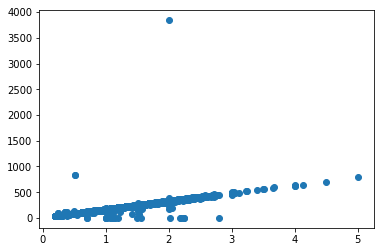

In [19]:
plt.scatter(data.carat,data.volume_prism);

8. Crea una nueva columna que se llame cut_numeric, asigne un número siguiendo el orden de incremento de mejora del corte: Fair -> 0, etc.



In [20]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [21]:
dict_cutnum = {'Ideal':3, 'Premium':4, 'Good':1, 'Very Good':2, 'Fair':0}

In [22]:
data.loc[:,'cut_numeric'] = data.cut.map(dict_cutnum)

También,

In [23]:
data.loc[:,'cut_numeric'] = data.cut.apply(lambda x: dict_cutnum[x])

9. Calcula la diferencia entre máximo y mínimo para las variables 'x', 'y', 'z':

In [24]:
data.loc[:, ['x', 'y', 'z']].apply(lambda x: x.max() - x.min())

x    10.74
y    58.90
z    31.80
dtype: float64

10. Muestra los primeros 10 diamantes con las variables numéricas redondeadas a 2 decimales:

Como me comentaron algunos compañeros en clase no hay por qué hacer un arco de iglesia.

In [25]:
data.head(10).round(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume_prism,cut_numeric
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.20,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.51,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.08,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.72,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.92,1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.69,2
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.83,2
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.32,2
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.43,0
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,38.72,2


Mi venganza ;P

10.b Muestra los primeros 10 diamantes con las variables numéricas redondeadas a 2 decimales. Todas en formato string e incluso los enteros deben mostrarse como 1 -> 1.00. Pista: https://pyformat.info/

In [40]:
data_tail10 = data.head(10).copy() #Ojo con el copy aquí!!!
numeric_cols = [i in ['float64', 'int64'] for i in data.dtypes]
data_tail10.loc[:,numeric_cols] = data_tail10.copy()\
.loc[:, numeric_cols]\
.applymap(lambda x: '{:.2f}'.format(x) )
data_tail10

,carat,cut,color,clarity,depth,table,price,x,y,z,volume_prism,cut_numeric
0,0.23,Ideal,E,SI2,61.50,55.00,326.00,3.95,3.98,2.43,38.20,3.00
1,0.21,Premium,E,SI1,59.80,61.00,326.00,3.89,3.84,2.31,34.51,4.00
2,0.23,Good,E,VS1,56.90,65.00,327.00,4.05,4.07,2.31,38.08,1.00
3,0.29,Premium,I,VS2,62.40,58.00,334.00,4.20,4.23,2.63,46.72,4.00
4,0.31,Good,J,SI2,63.30,58.00,335.00,4.34,4.35,2.75,51.92,1.00
5,0.24,Very Good,J,VVS2,62.80,57.00,336.00,3.94,3.96,2.48,38.69,2.00
6,0.24,Very Good,I,VVS1,62.30,57.00,336.00,3.95,3.98,2.47,38.83,2.00
7,0.26,Very Good,H,SI1,61.90,55.00,337.00,4.07,4.11,2.53,42.32,2.00
8,0.22,Fair,E,VS2,65.10,61.00,337.00,3.87,3.78,2.49,36.43,0.00
9,0.23,Very Good,H,VS1,59.40,61.00,338.00,4.00,4.05,2.39,38.72,2.00


### Arrange

11. Muestra los tres diamantes más caros.

In [44]:
data.sort_values('price', ascending=False).head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume_prism,cut_numeric
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,371.494200,4
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,317.333520,2
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,249.029352,3


12. Muestra los 3 diamantes más baratos del peor corte:

In [45]:
data.sort_values(['cut_numeric', 'price']).head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume_prism,cut_numeric
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214,0
28270,0.25,Fair,E,VS1,55.2,64.0,361,4.21,4.23,2.33,41.493339,0
31611,0.23,Fair,G,VVS2,61.4,66.0,369,3.87,3.91,2.39,36.164763,0


### Group by and summarise

13. Agrupa por corte y muestra la media de depth y table para cada grupo. Recuerda ordenar de peor a mejor 'cut'.

In [46]:
data.groupby('cut').mean().sort_values('cut_numeric', ascending=True).loc[:, ['depth', 'table']]

,depth,table
cut,,
Fair,64.041677,59.053789
Good,62.365879,58.694639
Very Good,61.818275,57.956150
Ideal,61.709401,55.951668
Premium,61.264673,58.746095


14. Agrupa por 'clarity' y muestra la mediana de depth y la media  y máximo de precio. Ordena por precio medio.

In [47]:
data.groupby('clarity').agg({'depth':'median', 'price':['mean', 'max']}).sort_values([('price','mean')], ascending=False)

depth        price       
        median         mean    max
clarity                           
SI2       61.9  5063.028606  18804
SI1       62.0  3996.001148  18818
VS2       61.8  3924.989395  18823
I1        62.2  3924.168691  18531
VS1       61.8  3839.455391  18795
VVS2      61.8  3283.737071  18768
IF        61.7  2864.839106  18806
VVS1      61.7  2523.114637  18777

15. Convierte en un DataFrame la tabla multiíndice anterior:

In [48]:
tabla_clarity = data.groupby('clarity').agg({'depth':'median', 'price':['mean', 'max']}).sort_values([('price','mean')], ascending=False)

In [49]:
tabla_clarity.columns = tabla_clarity.columns.map('_'.join)

In [50]:
tabla_clarity = tabla_clarity.reset_index()
tabla_clarity

,clarity,depth_median,price_mean,price_max
0,SI2,61.9,5063.028606,18804
1,SI1,62.0,3996.001148,18818
2,VS2,61.8,3924.989395,18823
3,I1,62.2,3924.168691,18531
4,VS1,61.8,3839.455391,18795
5,VVS2,61.8,3283.737071,18768
6,IF,61.7,2864.839106,18806
7,VVS1,61.7,2523.114637,18777


16. Repite los dos ejercicios anteriores pero agrupando por 'clarity', 'color' y 'cut'; además no uses el precio sino el precio por quilate.

In [51]:
tabla_categoricas = data.join((data.price/data.carat).rename('price_per_carat'))\
.groupby(['clarity', 'color', 'cut'])\
.agg({'depth':'median', 'price_per_carat':['mean', 'max']})\
.sort_values([('price_per_carat','mean')], ascending=False)
tabla_categoricas.columns = tabla_categoricas.columns.map('_'.join)
tabla_categoricas = tabla_categoricas.reset_index()
tabla_categoricas.head()

,clarity,color,cut,depth_median,price_per_carat_mean,price_per_carat_max
0,IF,D,Very Good,61.70,11346.512102,17828.846154
1,IF,D,Good,61.70,10876.804720,15928.000000
2,IF,D,Premium,61.20,10099.077901,17083.177570
3,IF,D,Ideal,61.65,9034.176510,17077.669903
4,IF,E,Premium,61.00,5817.339230,13181.343284


## Matplotlib

In [52]:
dplot = data.sample(n=10000)

17. Dibuja un plot en el que se visualice el precio de los diamantes frente a su peso.

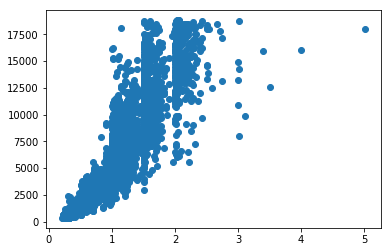

In [53]:
fig, axis = plt.subplots(ncols=1, nrows=1)
axis.scatter(dplot.carat, dplot.price);

**Críticas!!!**

  
* Ejes sin unidades ni nombre

* La escala no es la más apropiada para ver toda la variabilidad del dataset.
     
     
     



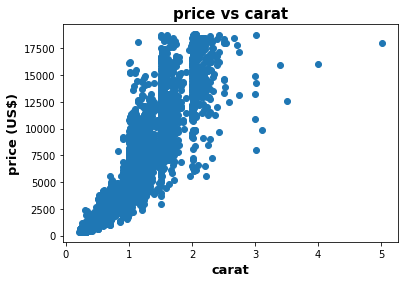

In [56]:
fig, axis = plt.subplots(ncols=1, nrows=1)
axis.scatter(dplot.carat, dplot.price)
axis.set_xlabel('carat', fontsize=13, fontweight='bold')
axis.set_ylabel('price (US$)', fontsize=13, fontweight='bold');
axis.set_title('price vs carat',  fontsize=15, fontweight='bold');

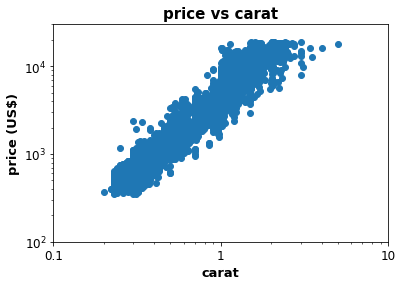

In [57]:
fig, axis = plt.subplots(ncols=1, nrows=1)
axis.scatter(dplot.carat, dplot.price)
axis.set_xlabel('carat', fontsize=13, fontweight='bold')
axis.set_ylabel('price (US$)', fontsize=13, fontweight='bold');
axis.set_title('price vs carat',  fontsize=15, fontweight='bold')
axis.set_yscale('log')
axis.set_xscale('log')
axis.set_xticks([0.1, 1,10]);
axis.set_yticks([1e2, 1e3, 1e4]);
axis.set_yticklabels(['$10^2$', '$10^3$', '$10^4$'],fontsize=12)
axis.set_xticklabels(['0.1', '1', '10'],fontsize=12)
axis.set_ylim([1e2, 3e4]);

Fijaos como los diamantes tienden a apelotonarse en carats completos:

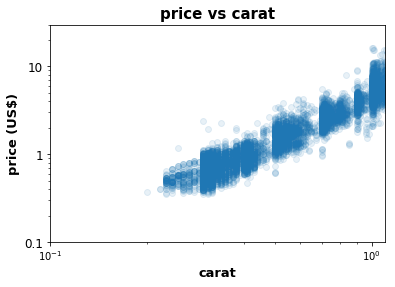

In [58]:
fig, axis = plt.subplots(ncols=1, nrows=1)
axis.scatter(dplot.carat, dplot.price, alpha=0.1)
axis.set_xlabel('carat', fontsize=13, fontweight='bold')
axis.set_ylabel('price (US$)', fontsize=13, fontweight='bold');
axis.set_title('price vs carat',  fontsize=15, fontweight='bold')
axis.set_yscale('log')
axis.set_xscale('log')
axis.set_xticks([0.1, 1,10]);
axis.set_yticks([1e2, 1e3, 1e4]);
axis.set_yticklabels(['$10^2$', '$10^3$', '$10^4$'],fontsize=12)
axis.set_yticklabels(['0.1', '1', '10'],fontsize=12)
axis.set_ylim([1e2, 3e4]);
axis.set_xlim([0.1, 1.1]);

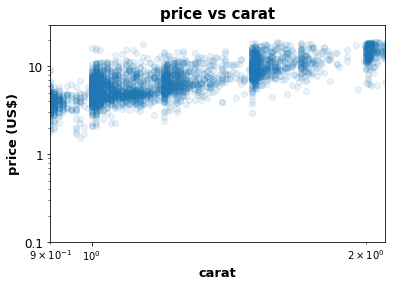

In [59]:
fig, axis = plt.subplots(ncols=1, nrows=1)
axis.scatter(dplot.carat, dplot.price, alpha=0.1)
axis.set_xlabel('carat', fontsize=13, fontweight='bold')
axis.set_ylabel('price (US$)', fontsize=13, fontweight='bold');
axis.set_title('price vs carat',  fontsize=15, fontweight='bold')
axis.set_yscale('log')
axis.set_xscale('log')
axis.set_xticks([0.1, 1,10]);
axis.set_yticks([1e2, 1e3, 1e4]);
axis.set_yticklabels(['$10^2$', '$10^3$', '$10^4$'],fontsize=12)
axis.set_yticklabels(['0.1', '1', '10'],fontsize=12)
axis.set_ylim([1e2, 3e4]);
axis.set_xlim([0.9, 2.1]);